<span style="font-size:2em;">**Discovering the Best Pokémon!**</span>

This dataset contains information on all 802 pokémon from all seven generations. The information contained in this dataset includes base stats, performances against other types, heights, weights, classifications, egg steps, experience points, abilities, etc. The information was scraped from [serebii](http://serebii.net/). 

**Features:**
- abilities: A stringified list of abilities that the pokémon is capable of having.
- against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type of pokémon.
- attack: The base attack of the pokémon.
- base_egg_steps: The number of steps required to hatch an egg of the pokémon.
- base_happiness: Base happiness of the pokémon.
- base_total: Sum of hp, attack, defense, sp_attack, sp_defense and speed.
- capture_rate: Capture rate of the pokémon.
- classification: The classification of the pokémon as described by the Sun and Moon pokédex.
- defense: The base defense of the pokémon.
- experience_growth: The experience growth of the pokémon.
- height_m: Height of the pokémon in metres.
- hp: The base HP of the pokemon. It is short for Hit Point, which determines how much damage a pokémon can receive before fainting.
- japanese_name: The original Japanese name of the pokémon.
- name: The English name of the pokémon.
- percentage_male: The percentage of the species that are male. Blank if the pokémon is genderless.
- pokedex_number: The entry number of the pokémon in the National Pokédex.
- sp_attack: The base special attack of the pokémon.
- sp_defense: The base special defense of the pokémon.
- speed: The base speed of the pokémon.
- type1: The primary type of the pokémon.
- type2: The secondary type of the pokémon.
- weight_kg: The weight of the pokémon in kilograms.
- generation: The numbered generation which the pokémon was first introduced.
- is_legendary: Denotes if the pokémon is legendary.

# Imports

In [32]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'axes.edgecolor':'gray', 
            'axes.labelcolor': 'gray', 
            'xtick.color': 'gray', 
            'ytick.color': 'gray', 
            'text.color': 'gray',
            'figure.figsize': (20, 10), 
            'legend.fontsize': 12, 
            'font.size': 12, 
            'legend.title_fontsize': 14, 
            'axes.labelsize': 14,
            'axes.titlesize': 24}, 
        style='white')

# Descriptive Statistics

Let's load the dataset, look at the descriptive statistics and check for missing values.

In [34]:
#pokemon_df = pd.read_csv('../input/pokemon/pokemon.csv')
pokemon_df = pd.read_csv('pokemon.csv')

print(f'Unique primary types: {pokemon_df["type1"].nunique()}')
print(f'Unique secondary types: {pokemon_df["type2"].nunique()}')

Unique primary types: 18
Unique secondary types: 18


In [35]:
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


In [36]:
pokemon_df.isnull().sum()[pokemon_df.columns[pokemon_df.isnull().any()]]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

# Data Processing

Before the data visualization, let's discard unnecessary columns from the dataset and create some new ones that will be useful throughout the analysis. Plus, we are renaming columns and some values for plotting purposes.

In [37]:
pokemon_df.drop(['japanese_name', 'pokedex_number', 'base_egg_steps', 'classfication', 'percentage_male'],
                axis=1, inplace=True)

pokemon_df.rename(str.title, axis='columns', inplace=True)

types = [t for t in list(pokemon_df['Type1'].unique())]
pokemon_df['Type1'].replace(types, [t.title() for t in types], inplace=True)
pokemon_df['Type2'].replace(types, [t.title() for t in types], inplace=True)

The first feature is created by joining type1 and type2 into a single type.

In [38]:
pokemon_df['Type'] = pokemon_df.apply(
    lambda x: x['Type1'] if pd.isnull(x['Type2']) else f'{x["Type1"]}_{x["Type2"]}', 
    axis=1)

Since the abilities column is a stringified list, there is the need to convert it back to a list.

In [39]:
pokemon_df['Abilities'] = pokemon_df.apply(lambda x: literal_eval(x['Abilities']), axis=1)

The next step is to create a column with the number of abilities.

In [40]:
pokemon_df['N_Abilities'] = pokemon_df.apply(lambda x: len(x['Abilities']), axis=1)

We are also creating the BMI column, which represents the Body Mass Index of the pokémon. The formula is calculated by dividing the weight in kilograms by the square of the height in meters.

In [41]:
pokemon_df['BMI'] = pokemon_df.apply(lambda x: x['Weight_Kg']/(x['Height_M']**2), axis=1)

Finally, Minior has two capture rates, so we are just ignoring such value by assigning it to NaN and changing the column type to numeric.

In [42]:
pokemon_df['Capture_Rate'].replace({'30 (Meteorite)255 (Core)': np.nan}, inplace=True)
pokemon_df['Capture_Rate'] = pd.to_numeric(pokemon_df['Capture_Rate'])

We are now ready to draw some plots!

# Data Visualization

We will walk through this section asking some interesting questions.

**How many new pokémon are there per generation?**

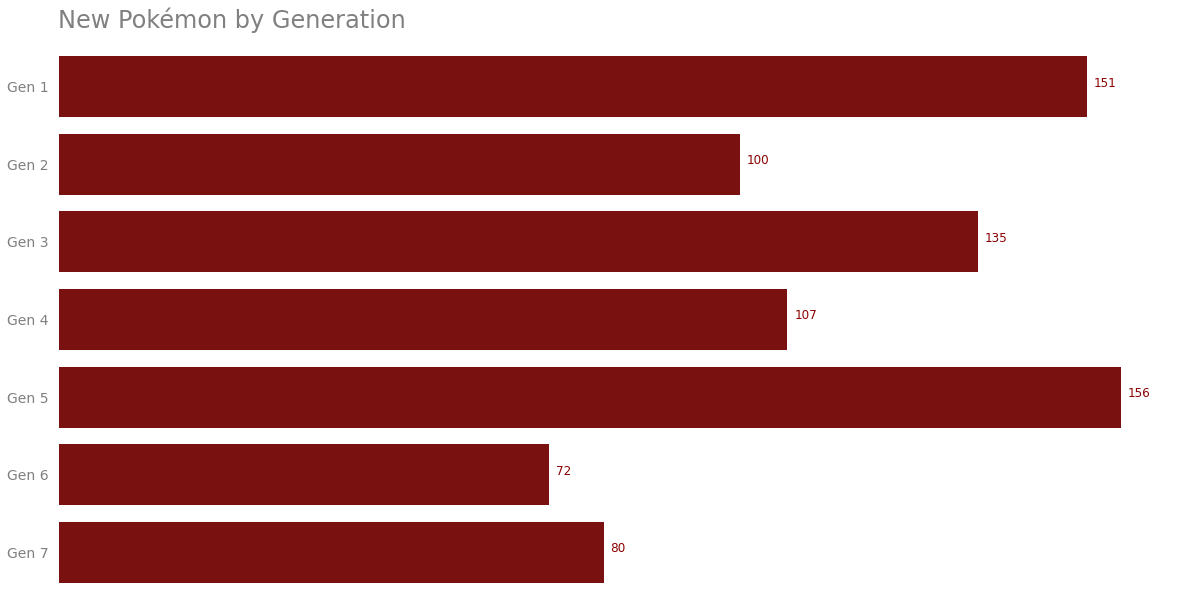

In [43]:
generations = [f'Gen {g}' for g in pokemon_df.Generation.unique()]

ax = sns.countplot(y=pokemon_df.Generation, orient='v', color='darkred')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_ylabel(ylabel='')
ax.set_yticklabels(generations, size=14)

ax.set_title('New Pokémon by Generation', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, value in enumerate(pokemon_df.Generation.value_counts().sort_index()): 
    plt.annotate(f'{value}', xy=(value + 1, index), color='darkred') 

Odd generations have more new pokémon compared to even ones.

**What are the most prevalent primary types?**

In [44]:
type1_value_counts = pokemon_df['Type1'].value_counts()

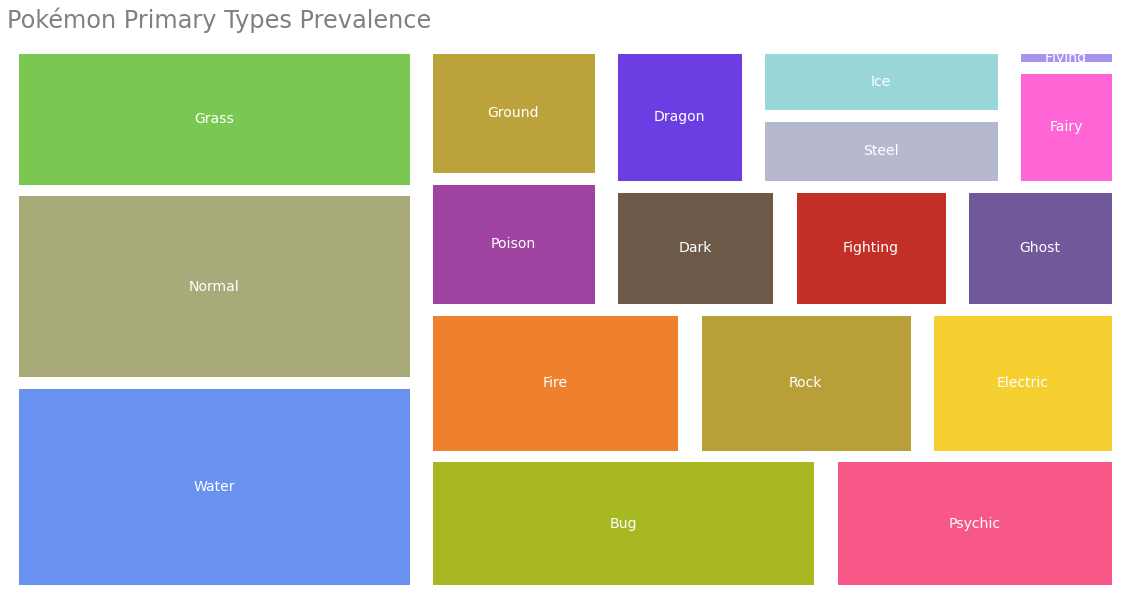

In [45]:
palette = ['#6991F0', '#A8AA79', '#7AC852', '#A7B822', '#F85887', '#EF812E', '#B99F38', '#F6D030', '#A0429F', 
           '#BCA23B', '#6D5947', '#C12F27', '#70589A', '#6B3EE3', '#B6B8D0', '#9AD7D9', '#FF65D5', '#A991F0']
ax = squarify.plot(type1_value_counts, 
              label=type1_value_counts.index,
              color=palette,
              pad=1,
              text_kwargs={'fontsize': 14, 'color': 'white'})
ax.set_title('Pokémon Primary Types Prevalence', loc='left', pad=20)
plt.axis('off');

Water type pokémon are the most common, followed by normal and grass.

**What about secondary types?**

In [46]:
print(f'To note that a very large number of Pokémon do not have a secondary type: {pokemon_df["Type2"].isnull().sum()}')

To note that a very large number of Pokémon do not have a secondary type: 384


In [47]:
type2_value_counts = pokemon_df['Type2'].value_counts()
types_df = pd.concat([type1_value_counts, type2_value_counts], axis=1)
types_df.sort_values(by='Type2', ascending=False, inplace=True)

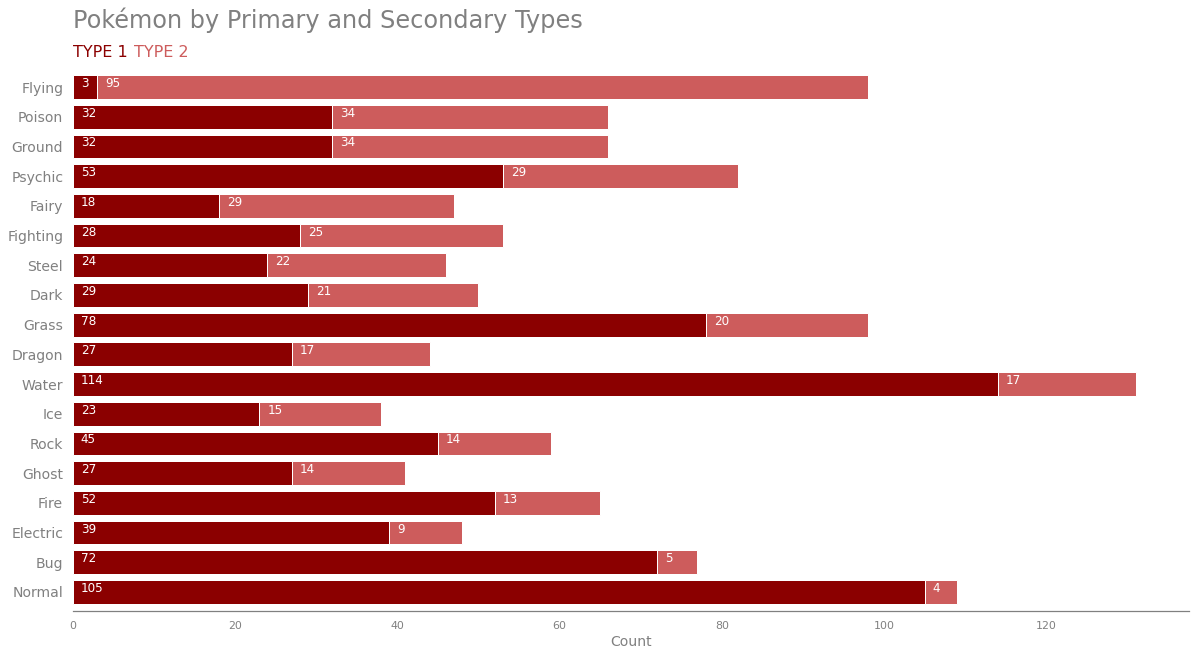

In [48]:
ax = types_df.plot.barh(stacked=True, color=['darkred', 'indianred'], width=0.8)

ax.invert_yaxis()

ax.get_legend().remove()

ax.annotate('TYPE 1', xy=(0, 0), xytext=(0, -1), color='darkred', size=16)
ax.annotate('TYPE 2', xy=(7.5, 0), xytext=(7.5, -1), color='indianred', size=16)

#ax.set_xlabel(xlabel='Count', loc='right')
ax.set_xlabel(xlabel='Count')

ax.set_yticklabels(ax.get_yticklabels(), size=14)

ax.set_title('Pokémon by Primary and Secondary Types', loc='left', pad=40)

sns.despine(top=True, right=True, left=True)

for index, row in enumerate(types_df.iterrows()): 
    plt.annotate(f'{row[1]["Type1"]}', xy=(1, index), color='white') 
    plt.annotate(f'{row[1]["Type2"]}', xy=(row[1]['Type1'] + 1, index), color='white') 

Flying is the most common type 2, followed by poison and ground.

**What are the most common type combinations?**

In [49]:
top10_type_counts = pokemon_df[~pokemon_df['Type2'].isnull()]["Type"].value_counts()[:10]

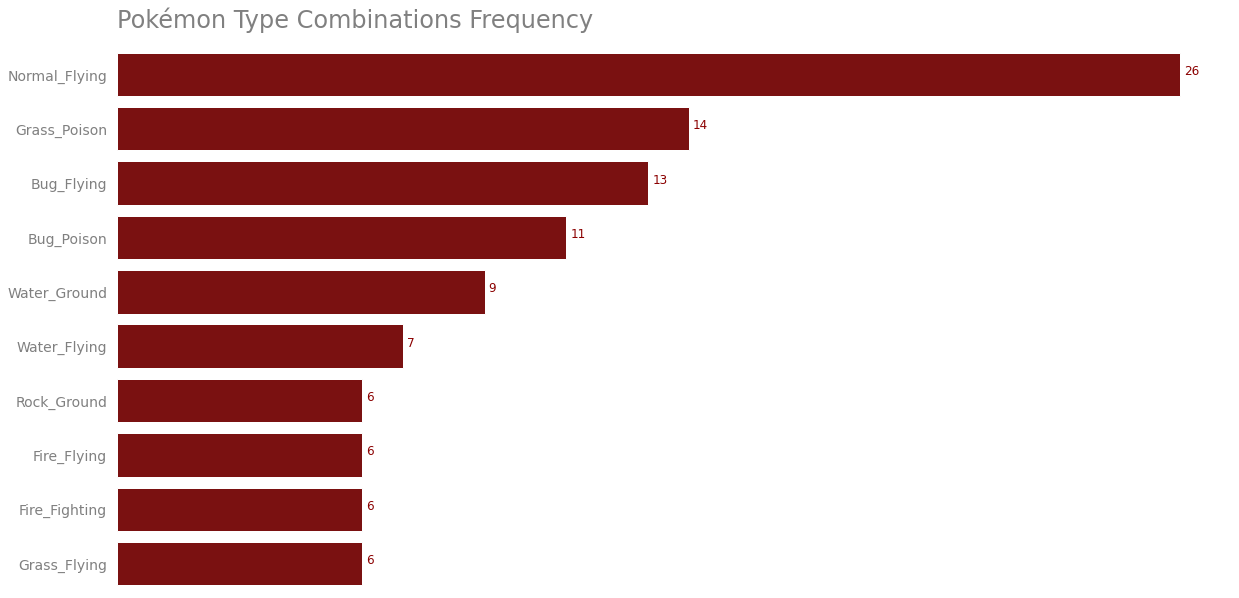

In [50]:
ax = sns.barplot(y=top10_type_counts.index, x=top10_type_counts.values, orient='h', color='darkred')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_yticklabels(ax.get_yticklabels(), size=14)

ax.set_title('Pokémon Type Combinations Frequency', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, value in enumerate(top10_type_counts): 
    plt.annotate(f'{value}', xy=(value + 0.1, index), color='darkred') 

Normal + flying, grass + poison and bug + flying are the most common type combinations.

**What are the most common types of legendary pokémon?**

In [51]:
legendary_pokemon = pokemon_df[pokemon_df['Is_Legendary'] == 1]
legendary_pokemon_types_top5 = legendary_pokemon["Type"].value_counts()[:5]

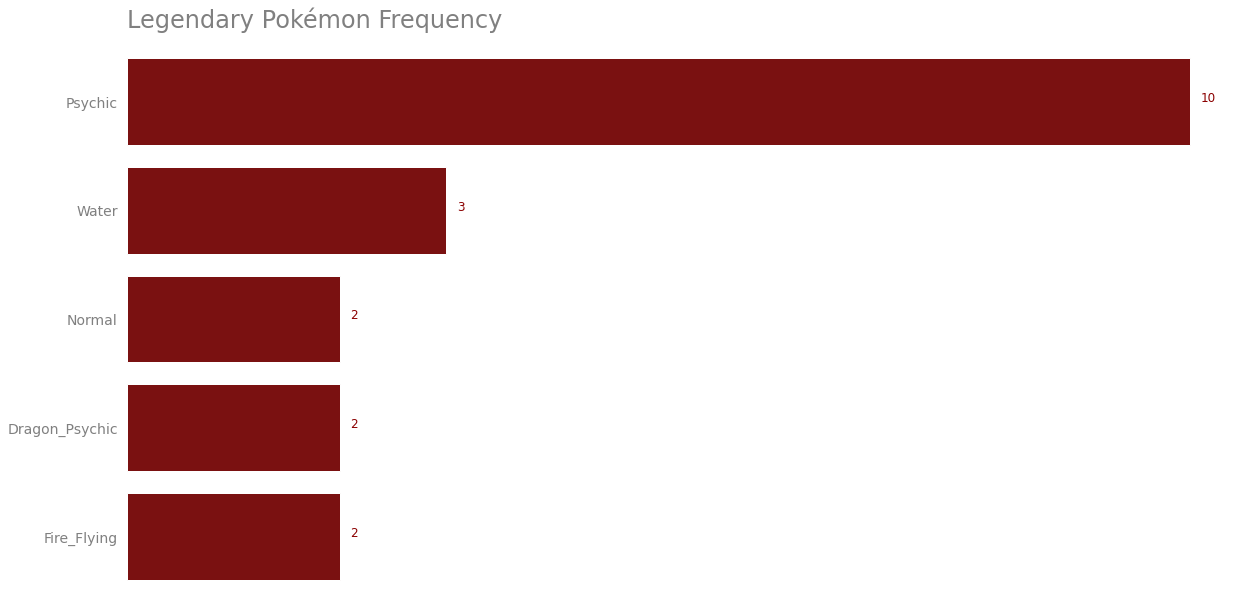

In [52]:
ax = sns.barplot(y=legendary_pokemon_types_top5.index, x=legendary_pokemon_types_top5.values, orient='h', color='darkred')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_yticklabels(ax.get_yticklabels(), size=14)

ax.set_title('Legendary Pokémon Frequency', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, value in enumerate(legendary_pokemon_types_top5): 
    plt.annotate(f'{value}', xy=(value + 0.1, index), color='darkred') 

Psychic is the most common type of legendary pokémon.

**How does primary type vary across generations?**

In [53]:
type1_by_generation_group = pokemon_df.groupby(['Generation', 'Type1'])['Name'].count().to_frame().reset_index()
type1_by_generation_group.rename(columns={'Name' : 'Count'}, inplace=True)

type1_by_generation_dict  = {}
for generation in list(type1_by_generation_group['Generation'].unique()):
    current_generation = []
    for type1 in type1_by_generation_group['Type1'].unique():
        try:
            current_generation.append(
                type1_by_generation_group.loc[(type1_by_generation_group['Generation']==generation) 
                                        & (type1_by_generation_group['Type1'] == type1)]['Count'].values[0])
        except IndexError:
            current_generation.append(0)
    type1_by_generation_dict[f'Generation {generation}'] = current_generation

type1_by_generation = pd.DataFrame(type1_by_generation_dict, index= type1_by_generation_group['Type1'].unique())

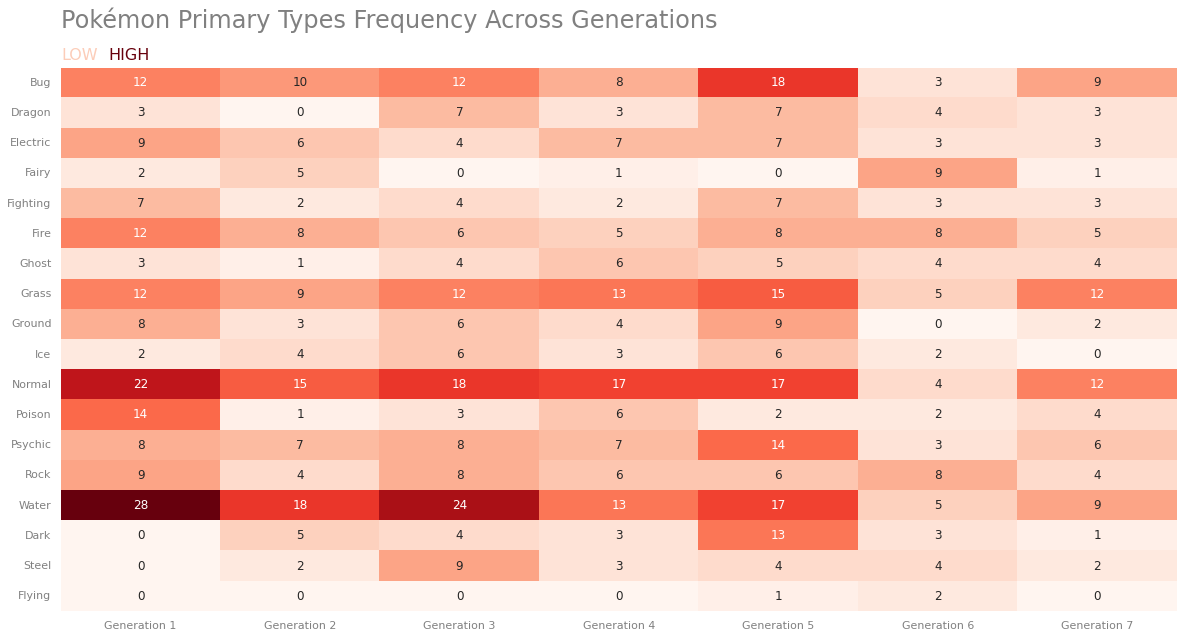

In [54]:
ax = sns.heatmap(type1_by_generation, annot= True, cbar=False, cmap='Reds')

ax.annotate('LOW', xy=(0, 0), xytext=(0, -0.25), color='#FCCDB9', size=16)
ax.annotate('HIGH', xy=(0.3, 0), xytext=(0.3, -0.25), color='#67000C', size=16)

ax.set_title('Pokémon Primary Types Frequency Across Generations', loc='left', pad=40);

A few types don't exist in some generations, like dark, steel and flying in generation 1 and dragon and flying in generation 2.

Flying only exists as primary type in generations 5 and 6. 

There is an unusually high amount of poison type pokémon in the first generation, steel type in the third, dark and psychic type in the fifth and fairy in the sixth.

**Which generation has the easiest pokémon to catch?**

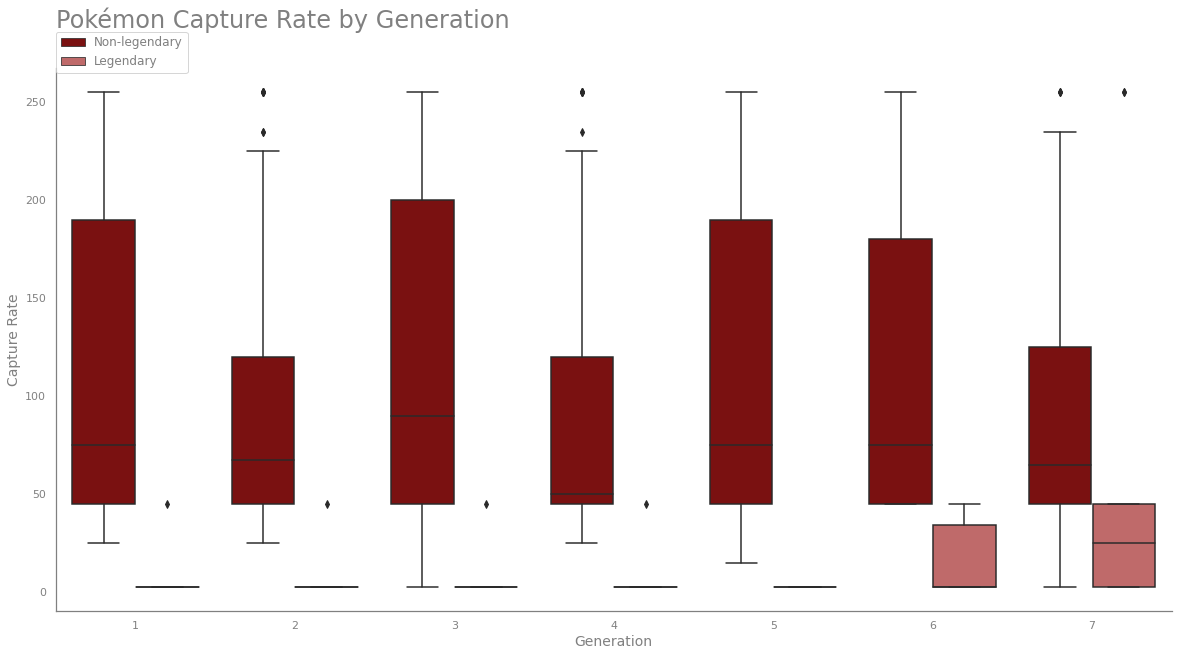

In [55]:
ax = sns.boxplot(x='Generation',y='Capture_Rate', hue='Is_Legendary', data = pokemon_df, palette=['darkred', 'indianred'])

#ax.set_xlabel(xlabel='Generation', loc='left')
ax.set_xlabel(xlabel='Generation')
#ax.set_ylabel(ylabel='Capture Rate', loc='top')
ax.set_ylabel(ylabel='Capture Rate')

ax.set_title('Pokémon Capture Rate by Generation', loc='left', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(0,0.99));

Generation 3 has the easiest pokémon to catch, while generation 4 has the hardest.

Legendary pokémon are easier to capture from generation 6 onwards.

**Which type has the easiest pokémon to catch?**

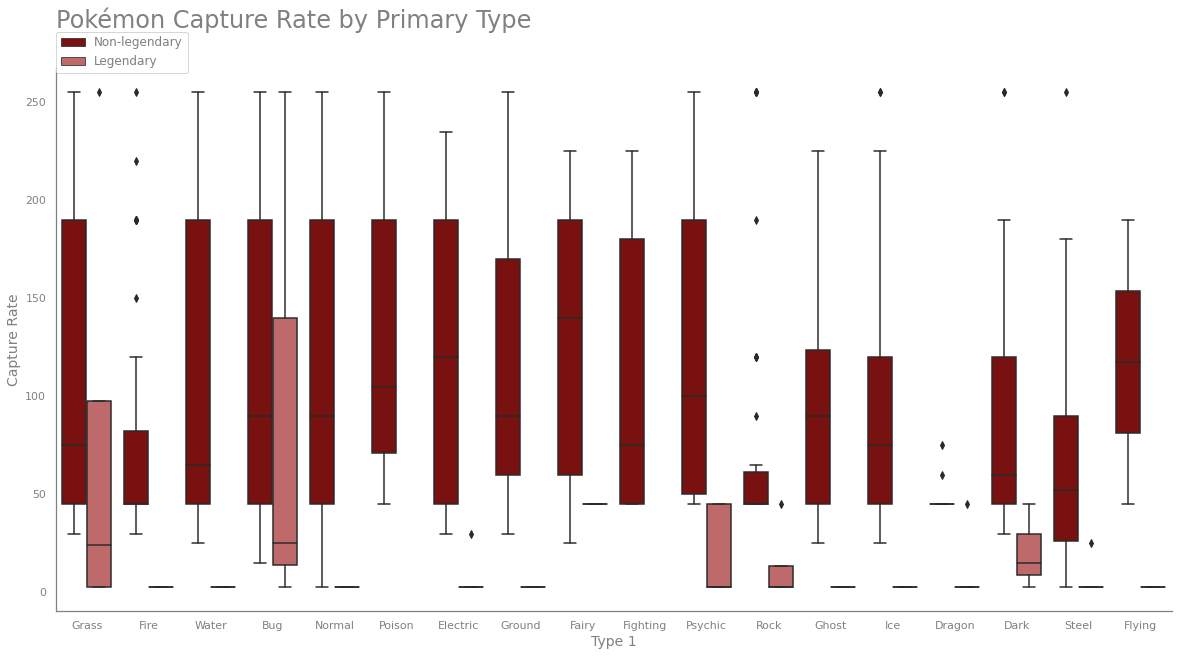

In [59]:
ax = sns.boxplot(x='Type1',y='Capture_Rate', hue='Is_Legendary', data = pokemon_df, palette=['darkred', 'indianred'])

#ax.set_xlabel(xlabel='Type 1', loc='left')
ax.set_xlabel(xlabel='Type 1')
#ax.set_ylabel(ylabel='Capture Rate', loc='top')
ax.set_ylabel(ylabel='Capture Rate')

ax.set_title('Pokémon Capture Rate by Primary Type', loc='left', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(0,0.99));

Fairy type has the easiest pokémon to catch, while dragon has the hardest.

The easiest legendary pokémon to catch are of type grass and bug.

**How many abilities do pokémon usually have?**

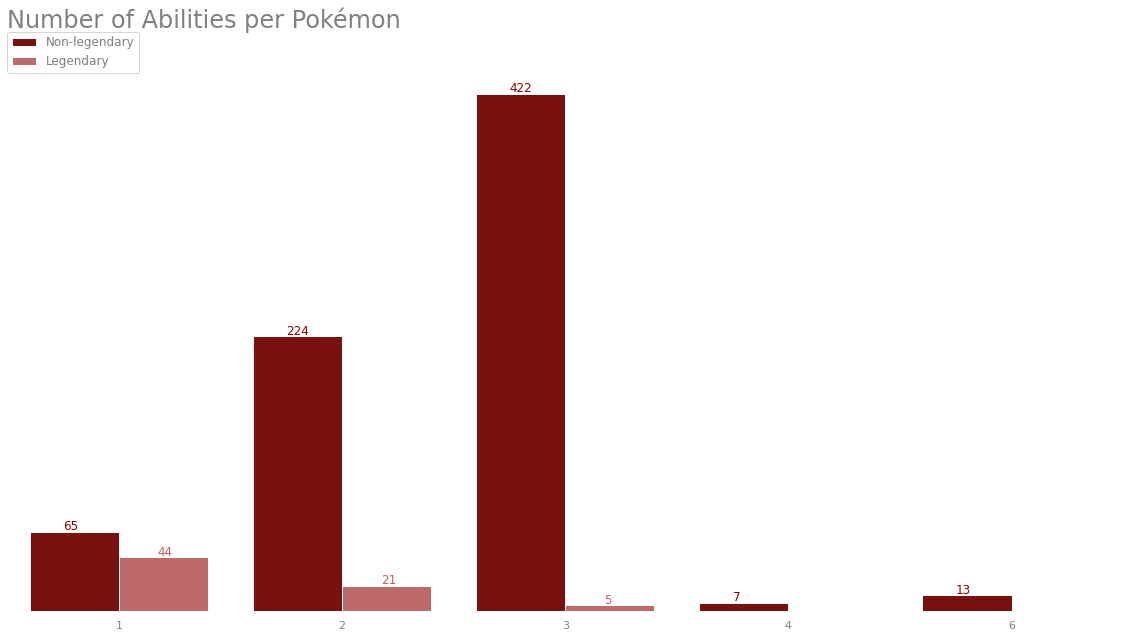

In [60]:
ax = sns.countplot(data=pokemon_df, x='N_Abilities', hue='Is_Legendary', palette=['darkred', 'indianred'])

ax.set_xlabel(xlabel='')
ax.set_ylabel(ylabel='')
ax.set_yticklabels([])

ax.set_title('Number of Abilities per Pokémon', loc='left', pad=40)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, value in enumerate(pokemon_df[pokemon_df['Is_Legendary'] == False].N_Abilities.value_counts().sort_index()): 
    plt.annotate(f'{value}', xy=(index - 0.25, value + 1), color='darkred') 

for index, value in enumerate(pokemon_df[pokemon_df['Is_Legendary'] == True].N_Abilities.value_counts().sort_index()): 
    plt.annotate(f'{value}', xy=(index + 0.175, value + 1), color='indianred') 

ax.legend(['Non-legendary', 'Legendary'], loc=(0, 0.99));

3 is the most common number of abilities for non-legendary pokémon, while most legendary pokémon only have 1 ability.

**What are the heavier and taller pokémon?**

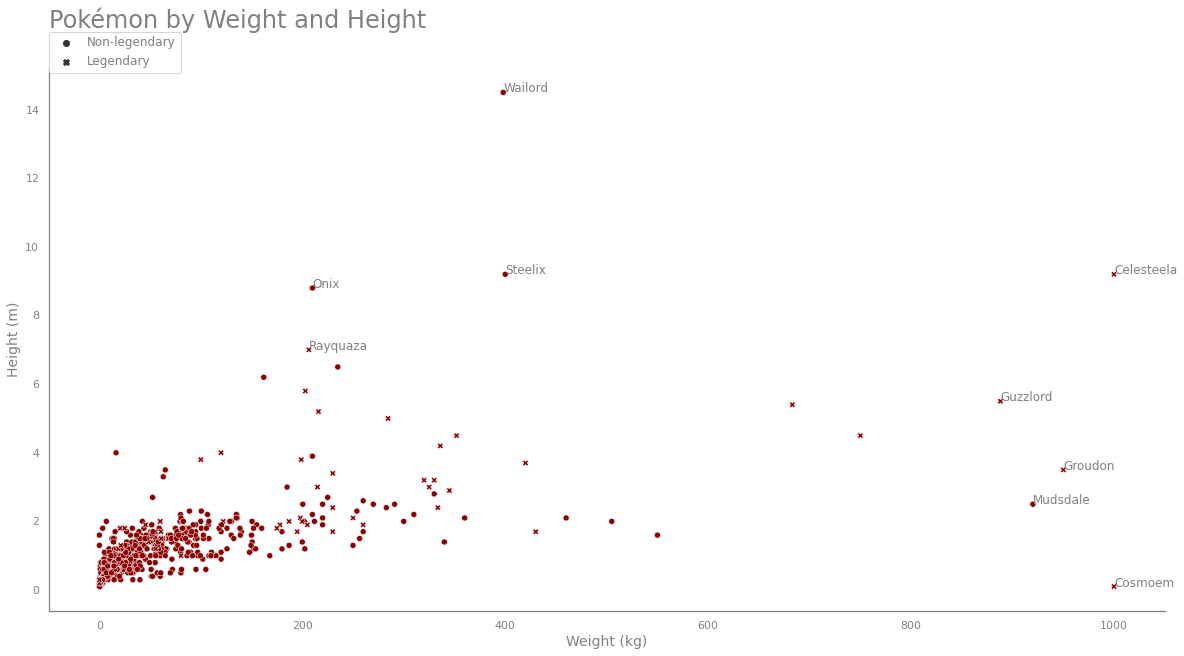

In [62]:
ax = sns.scatterplot(x = 'Weight_Kg', y = 'Height_M', style ='Is_Legendary', data=pokemon_df, color='darkred')

#ax.set_xlabel(xlabel='Weight (kg)', loc='left')
#ax.set_ylabel(ylabel='Height (m)', loc='top')
ax.set_xlabel(xlabel='Weight (kg)')
ax.set_ylabel(ylabel='Height (m)')

ax.set_title('Pokémon by Weight and Height', loc='left', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(0,0.99));

top5_weight_height_merged = pd.concat([pokemon_df.nlargest(5, 'Height_M'), pokemon_df.nlargest(5, 'Weight_Kg')]).drop_duplicates(subset=['Name'])
for index, row in top5_weight_height_merged.iterrows():
    plt.annotate(row['Name'], xy=(row['Weight_Kg'], row['Height_M']))

2 out of 5 of the tallest pokémon are legendary, while 4 out of 5 of the heavier pokémon are legendary.

Celesteela is the only pokémon in the top 5 in weight and height.

**Which pokémon has the highest BMI?**

In [63]:
top10_highest_bmi = pokemon_df.loc[:, ['Name', 'BMI']].sort_values(by='BMI', ascending=False)[:10].reset_index()

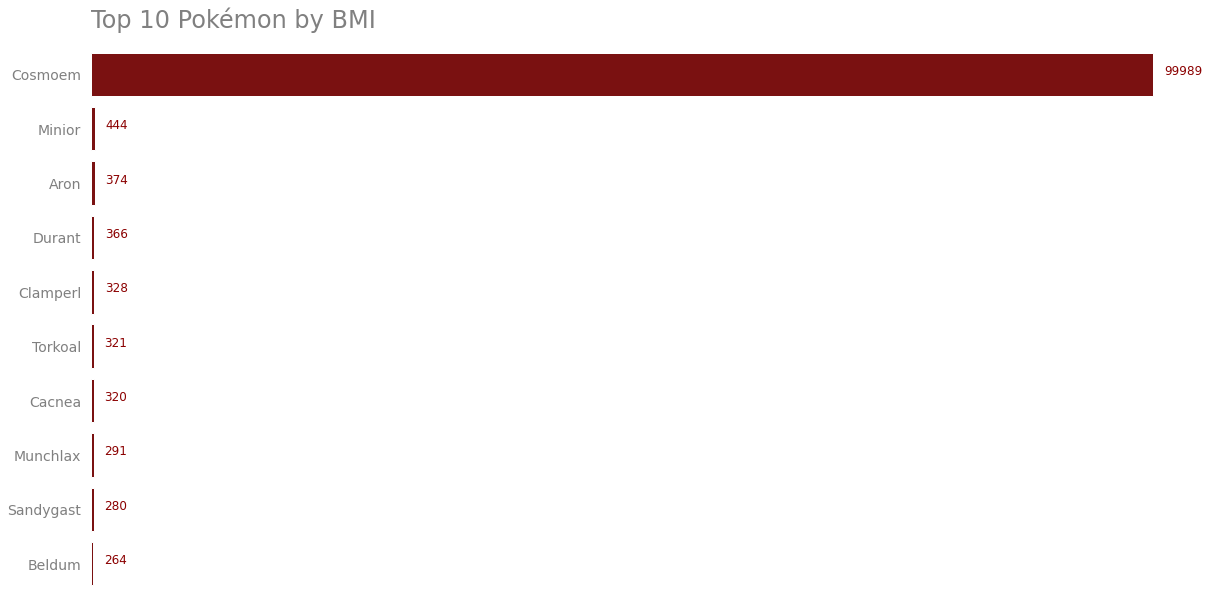

In [64]:
ax = sns.barplot(y=top10_highest_bmi['Name'], x=top10_highest_bmi['BMI'], color='darkred')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), size=14)

ax.set_title('Top 10 Pokémon by BMI', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, value in top10_highest_bmi.iterrows(): 
    plt.annotate(f'{int(value["BMI"])}', xy=(value['BMI'] + 1000, index), color='darkred') 

Cosmoem is a clear winner!

**Which pokémon has the lowest BMI?**

In [65]:
top10_lowest_bmi = pokemon_df.loc[:, ['Name', 'BMI']].sort_values(by='BMI', ascending=True)[:10].reset_index()

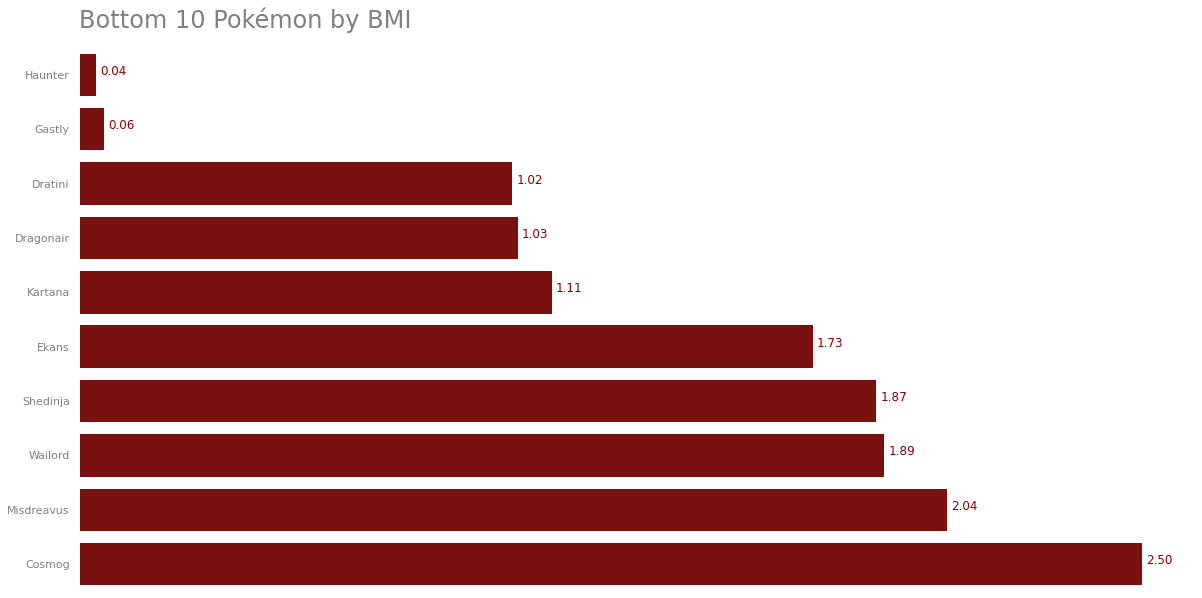

In [66]:
ax = sns.barplot(y=top10_lowest_bmi['Name'], x=top10_lowest_bmi['BMI'], color='darkred')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_ylabel(ylabel='')

ax.set_title('Bottom 10 Pokémon by BMI', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, value in top10_lowest_bmi.iterrows(): 
    plt.annotate(f'{value["BMI"]:.2f}', xy=(value['BMI'] + 0.01, index), color='darkred') 

Haunter and its previous form (Gastly) are the winners, followed by Dratini and its evolution (Dragonair).

**Which is the best generation?**

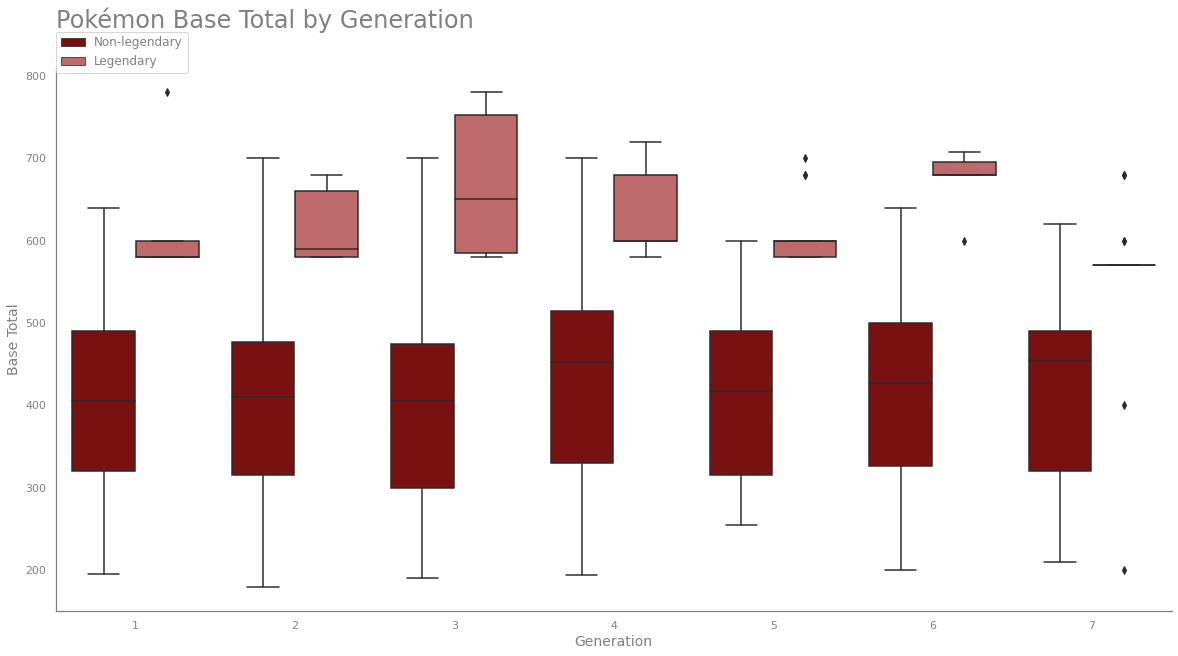

In [69]:
ax = sns.boxplot(x='Generation',y='Base_Total', hue='Is_Legendary', data = pokemon_df, palette=['darkred', 'indianred'])

#ax.set_xlabel(xlabel='Generation', loc='left')
#ax.set_ylabel(ylabel='Base Total', loc='top')
ax.set_xlabel(xlabel='Generation')
ax.set_ylabel(ylabel='Base Total')

ax.set_title('Pokémon Base Total by Generation', loc='left', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(0,0.99));

Generation 4 has the best pokémon, while generation 3 has the best legendary pokémon.

**How are attributes related?**

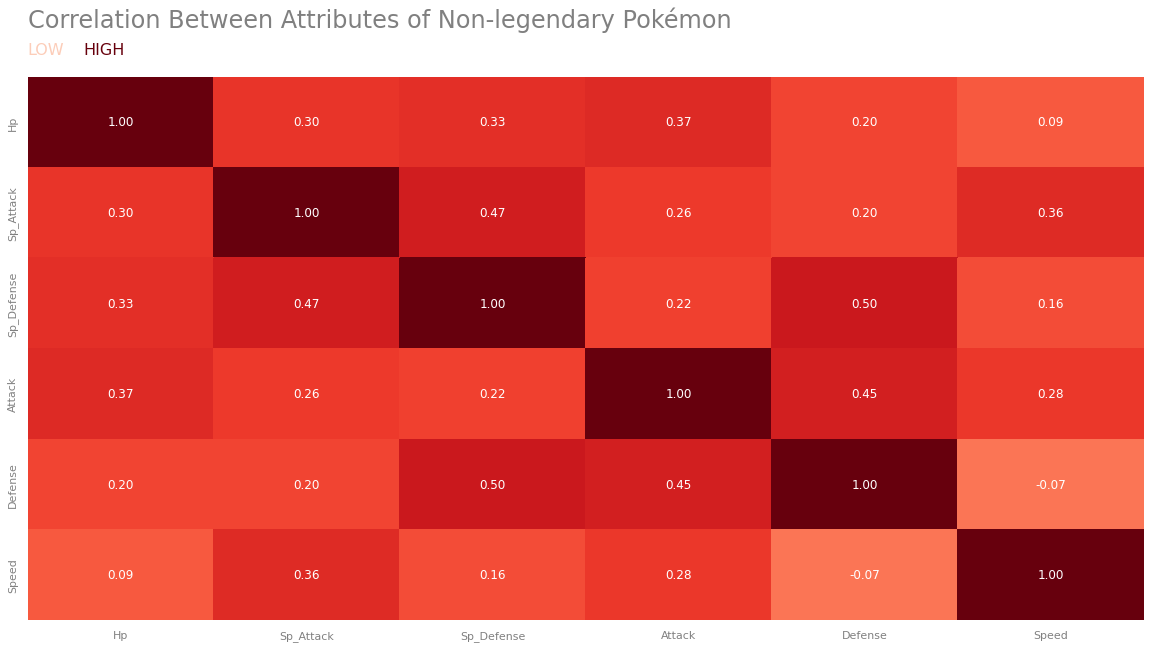

In [70]:
ax = sns.heatmap((pokemon_df[pokemon_df['Is_Legendary']==0].loc[:,['Hp','Sp_Attack','Sp_Defense','Attack','Defense','Speed']]).corr(),
            annot= True,
            fmt = ".2f",
            vmin = -1,
            vmax = 1,
            cbar=False,
            cmap='Reds')

ax.annotate('LOW', xy=(0, 0), xytext=(0, -0.25), color='#FCCDB9', size=16)
ax.annotate('HIGH', xy=(0.3, 0), xytext=(0.3, -0.25), color='#67000C', size=16)

ax.set_title('Correlation Between Attributes of Non-legendary Pokémon', loc='left', pad=50);

* Regarding non-legendary pokémon:
    
    - There seems to be a positive relationship between hp and sp_attack, sp_defense and attack. Such relationship is less significant for defense, which is kind of surprising, I thought a defensive Pokemon would have a higher hp.
    - Attack has the strongest relationship with defense.
    - Defense has the strongest relationship with sp_defense.
    - Speed has a very weak negative relationship with defense.

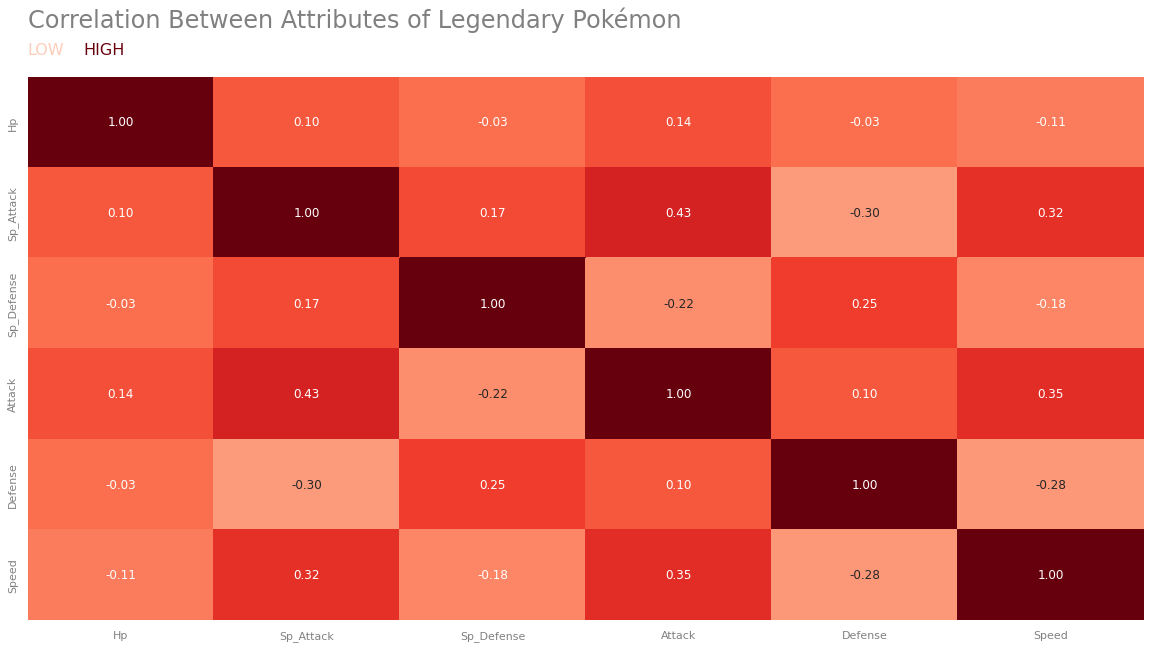

In [71]:
ax = sns.heatmap((pokemon_df[pokemon_df['Is_Legendary']==1].loc[:,['Hp','Sp_Attack','Sp_Defense','Attack','Defense','Speed']]).corr(),
            annot= True,
            fmt = ".2f",
            vmin = -1,
            vmax = 1,
            cbar=False,
            cmap='Reds')

ax.annotate('LOW', xy=(0, 0), xytext=(0, -0.25), color='#FCCDB9', size=16)
ax.annotate('HIGH', xy=(0.3, 0), xytext=(0.3, -0.25), color='#67000C', size=16)

ax.set_title('Correlation Between Attributes of Legendary Pokémon', loc='left', pad=50);

Considering legendary pokémon, the relationships between attack and sp_defense and defense and sp_attack changed to negative. Plus, the relationship between attack and speed and defense and speed got stronger (positive and negative, respectively). 

**Which is the best type?**

In [72]:
non_legendary_pokemon_attributes = pokemon_df[pokemon_df['Is_Legendary']==0].groupby(['Type1']).median()[['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed', 'Base_Total']]

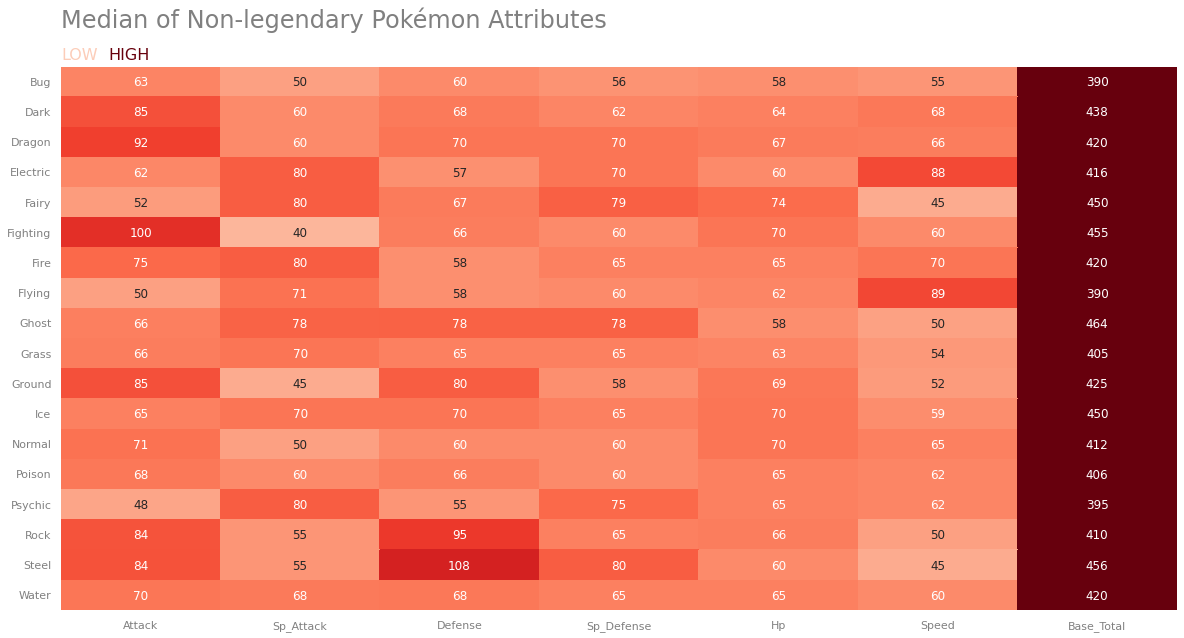

In [73]:
ax = sns.heatmap(non_legendary_pokemon_attributes,
            annot= True,
            fmt = ".0f",
            vmin = 0,
            vmax = 150,
            cbar=False,
            cmap='Reds')

ax.set_ylabel(ylabel='')

ax.annotate('LOW', xy=(0, 0), xytext=(0, -0.25), color='#FCCDB9', size=16)
ax.annotate('HIGH', xy=(0.3, 0), xytext=(0.3, -0.25), color='#67000C', size=16)

ax.set_title('Median of Non-legendary Pokémon Attributes', loc='left', pad=40);

* Regarding non-legendary pokémon:
    - Top 5 types - attack: fighting, dragon, ground, dark, steel
    - Top 5 types - sp_attack: psychic, electric, fairy, fire, ghost
    - Top 5 types - defense: steel, rock, ground, ghost, ice
    - Top 5 types - sp_defense: steel, fairy, ghost, psychic, dragon
    - Top 5 types - hp: fairy, normal, fighting, ice, ground
    - Top 5 types - speed: flying, electric, fire, dark, dragon
    - Top 5 types - base_total: ghost, steel, fighting, fairy and ice

Good types to attack are electric, fire, dark and dragon, since they are in the top 5 for attack or sp_attack and speed.

Good types to defend are fairy, ice and ground, since they are in the top 5 for defense or sp_defense and hp.

To highlight ground, which is in the top 5 for attack, defense and hp. However, it is not in the top5 for base_total, due to its low values for sp_attack, sp_defense and speed.

In [74]:
legendary_pokemon_attributes = pokemon_df[pokemon_df['Is_Legendary']==1].groupby(['Type1']).median()[['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed', 'Base_Total']]

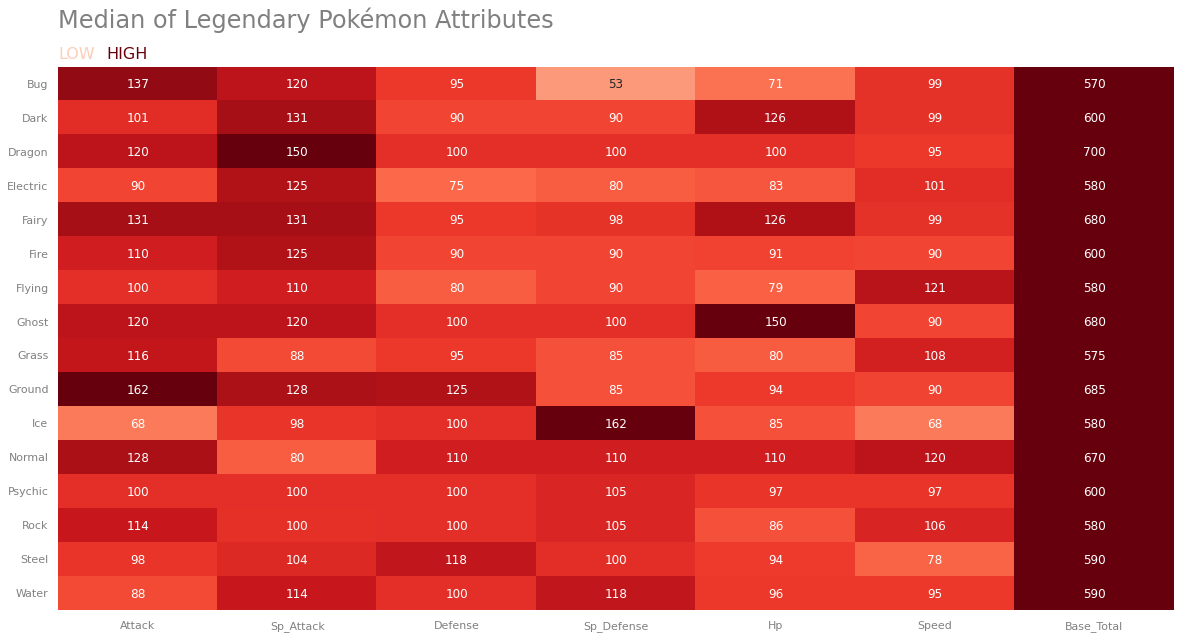

In [75]:
ax = sns.heatmap(legendary_pokemon_attributes,
            annot= True,
            fmt = ".0f",
            vmin = 0,
            vmax = 150,
            cbar=False,
            cmap='Reds')

ax.set_ylabel(ylabel='')

ax.annotate('LOW', xy=(0, 0), xytext=(0, -0.25), color='#FCCDB9', size=16)
ax.annotate('HIGH', xy=(0.3, 0), xytext=(0.3, -0.25), color='#67000C', size=16)

ax.set_title('Median of Legendary Pokémon Attributes', loc='left', pad=40);

* Regarding legendary pokémon:
    - Top 5 types - attack: ground, bug, fairy, normal, dragon
    - Top 5 types - sp_attack: dragon, dark, fairy, ground, electric
    - Top 5 types - defense: ground, steel, normal, dragon, ghost
    - Top 5 types - sp_defense: ice, water, normal, psychic, rock
    - Top 5 types - hp: ghost, dark, fairy, normal, dragon
    - Top 5 types - speed: flying, normal, grass, rock, electric
    - Top 5 types - base_total: dragon, ground, fairy, ghost, normal

Good types to attack are normal and electric, since they are in the top 5 for attack or sp_attack and speed.

Good types to defend are ghost, normal and dragon, since they are in the top 5 for defense or sp_defense and hp.

To highlight normal, which is in the top 5 for attack, defense, sp_defense, hp and speed. However, it is only fifth in base_total.

**Let's analyze type effectiveness.**

In [76]:
against_columns = ['Against_Bug', 'Against_Dark', 'Against_Dragon', 'Against_Electric', 'Against_Fairy', 'Against_Fight', 'Against_Fire',
 'Against_Flying', 'Against_Ghost', 'Against_Grass', 'Against_Ground', 'Against_Ice', 'Against_Normal', 'Against_Poison', 
 'Against_Psychic', 'Against_Rock', 'Against_Steel', 'Against_Water']

pokemon_type_effectiveness = pokemon_df.groupby(['Type1']).median()[against_columns].T

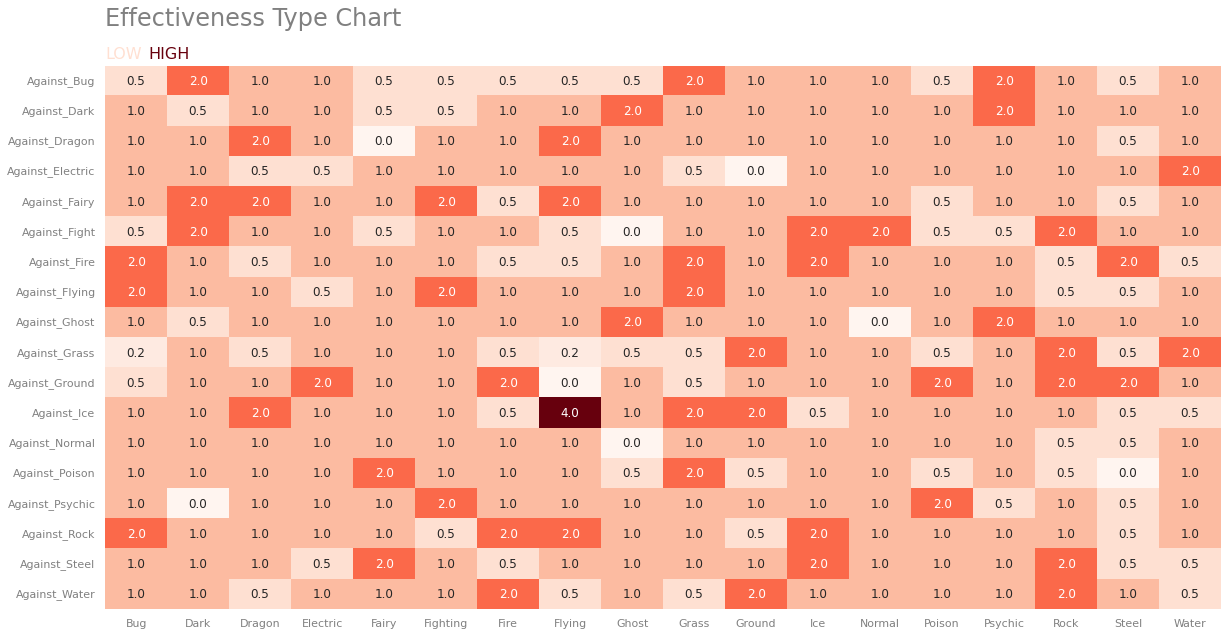

In [77]:
ax = sns.heatmap(pokemon_type_effectiveness,
            annot= True,
            fmt = ".1f",
            vmin = 0,
            vmax = 4,
            cbar=False,
            cmap='Reds')

ax.set_xlabel(xlabel='')
ax.set_ylabel(ylabel='')

ax.annotate('LOW', xy=(0, 0), xytext=(0, -0.25), color='#FFE0D2', size=16)
ax.annotate('HIGH', xy=(0.7, 0), xytext=(0.7, -0.25), color='#67000D', size=16)

ax.set_title('Effectiveness Type Chart', loc='left', pad=40);

To highlight that electric is only weak against (against>=2) ground and normal is only weak against fighting.
It is curious that ghost is weak against ghost and that flying is extremely weak against ice. 

* There are some types that are pretty useless against (against=0):
    - psychic against dark
    - dragon against fairy 
    - ground against flying
    - fighting against ghost
    - normal against ghost
    - ghost against normal
    - electric against ground
    - poison against steel
    
Take a look [here](https://pokemondb.net/type) to validate these results.

**Which is the best pokémon?**

Let's look at the top 10 most powerful Pokémon (as per the base total stat).

In [78]:
top10_pokemon_base_total = pokemon_df.sort_values(by='Base_Total', ascending=False).reset_index()[:10]

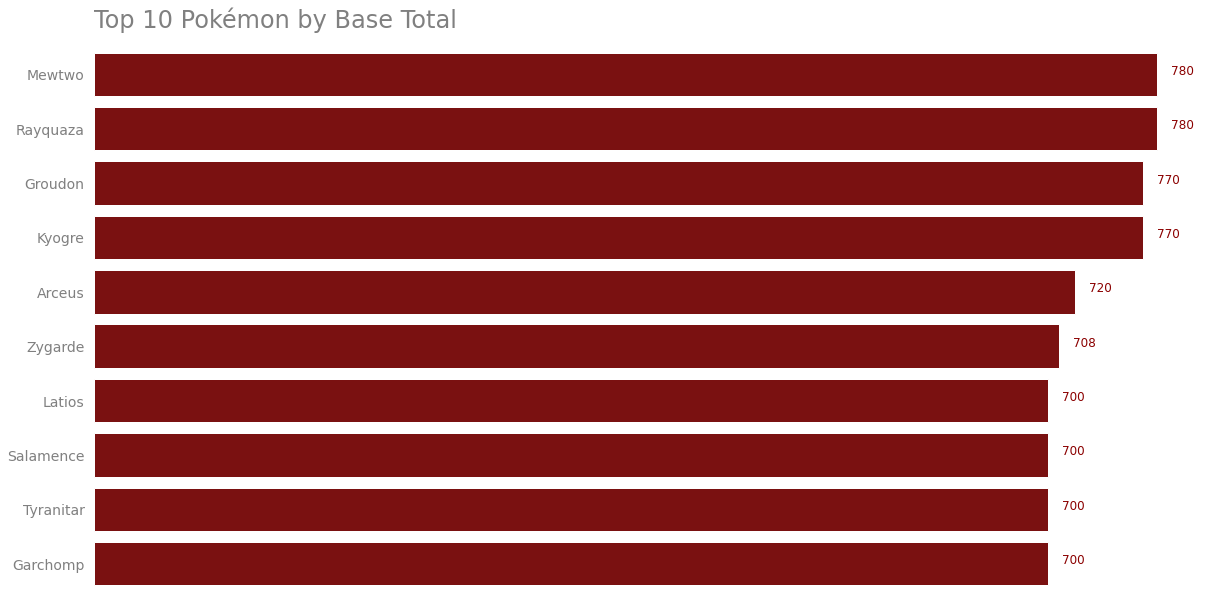

In [79]:
ax = sns.barplot(y=top10_pokemon_base_total['Name'], x=top10_pokemon_base_total['Base_Total'], orient='h', color='darkred')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])

ax.set_ylabel(ylabel='')
ax.set_yticklabels(ax.get_yticklabels(), size=14)

ax.set_title('Top 10 Pokémon by Base Total', loc='left', pad=20)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, row in top10_pokemon_base_total.iterrows(): 
    plt.annotate(row['Base_Total'], xy=(row['Base_Total'] + 10, index), color='darkred') 

And we have a tie! Let's compare Mewtwo and Rayquaza by using a radar chart.

In [80]:
attributes=['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed']

mewtwo= top10_pokemon_base_total[top10_pokemon_base_total['Name'] == 'Mewtwo'][attributes].values.tolist()[0]
rayquaza = top10_pokemon_base_total[top10_pokemon_base_total['Name'] == 'Rayquaza'][attributes].values.tolist()[0]

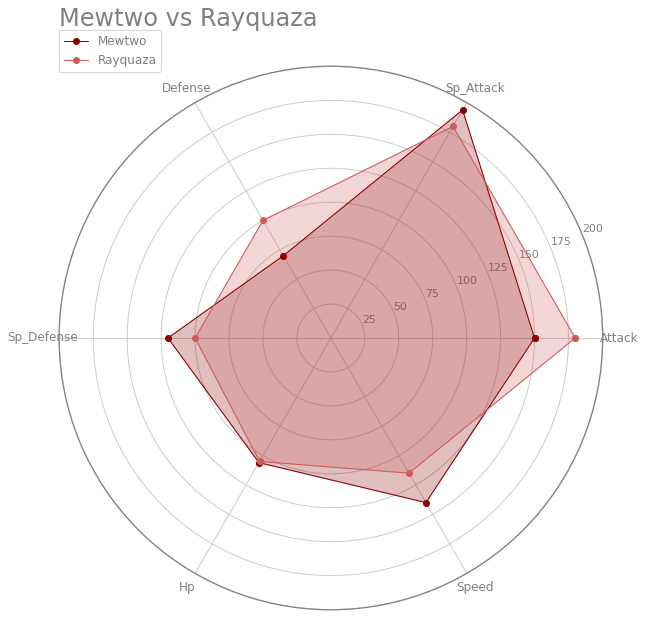

In [81]:
angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
attributes.append(attributes[0])
mewtwo.append(mewtwo[0])
rayquaza.append(rayquaza[0])

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, polar=True)

# Mewtwo Plot
ax.plot(angles, mewtwo, 'o-', color='darkred', linewidth=1, label='Mewtwo')
ax.fill(angles, mewtwo, alpha=0.25, color='darkred')

# Rayquaza Plot
ax.plot(angles,rayquaza, 'o-', color='indianred', linewidth=1, label='Rayquaza')
ax.fill(angles, rayquaza, alpha=0.25, color='indianred')

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Mewtwo', 'Rayquaza'], loc=(0,0.99));

ax.set_title("Mewtwo vs Rayquaza", loc='left', pad=40);

Rayquaza has better attack and defense while Mewtwo is better considering the remaining attributes.

# References

1. (2020). Pokemon Data Visualization. Available at: https://www.kaggle.com/shreekant009/pokemon-data-visualization/notebook
2. Agarwal, L. (2018). Data Visualization - Pokemon Data. Available at: https://www.kaggle.com/lakshyaag/data-visualization-pokemon-data
3. (2019). Pokémon! Kaggle Learn Edition. Available at: https://www.kaggle.com/aplayer98/pok-mon-kaggle-learn-edition
4. Coetzee, J. (2018). DataVis Battle Entry: Getting to know my Pokémon. Available at: https://towardsdatascience.com/reddit-datavis-entry-getting-to-know-my-pok%C3%A9mon-e0bcf4b4b803
5. Verma, A. (2018). GgPlot ‘Em All | Pokemon. Available at: https://towardsdatascience.com/exploratory-analysis-of-pokemons-using-r-8600229346fb
6. The Python Graph Gallery. (2018). Radar Chart. Available at: https://www.python-graph-gallery.com/radar-chart
7. Chandradas, A. (2021). How to Create a Radar Chart in Python. Available at: https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64

**If you like this notebook, please give it an upvote as it keeps me motivated. Plus, I am open to feedback.**